## Tarea 7.9 ##

Use un polinomio interpolante para aproximar la integral de una gaussiana con $\sigma = 1$ y $\mu = 0$, entre $x = 0$ y $x = 1$. Compare con el resultado obtenido a partir de

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

donde $\text{erf}(a)$ es la función de error y en python se puede llamar usando scipy.special.erf del modulo scipy.

La función Gaussiana esta dada por
$$
\rho(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Dado los valores del problema donde $\sigma = 1 $ y $\mu = 0$ entre los rangos $x \in [0,1]$
entonces,

$$
\rho(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x)^2}{2}}
$$

Por lo tanto, lo que se nos pide es la aproximación a la integral de $\int\rho(x)dx$ entre los intervalos $x \in [0, 1]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def gauss(x, mu, sigma): #función gaussiana para cualquier valor de sigma y mu
    
    return np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)


In [2]:
def gaussiana(x): #simplificamos la función ya que los valores de varianza y el centro de la campana tienen valores
                  #fijos, sigma = 1 y mu = 0
    return np.exp(-(x)**2/(2))/np.sqrt(2*np.pi)                                                                                        

In [7]:
integrate.quad(gaussiana, 0, 1)

(0.341344746068543, 3.789687964201238e-15)

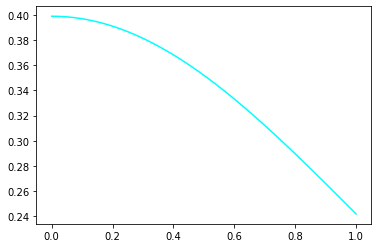

In [8]:
x = np.linspace(0, 1, 100)

plt.plot(x, gaussiana(x), color = 'cyan')
plt.show()

Ya sabiendo la forma de la función Gaussiana, buscamos un polinomio interpolante acorde a esta función. Para esto ocuparemos el polinomio de Lagrange visto en clases. Este polinomio está dado por:

$$
P(x) = \sum_{i = 0}^n f(x_i) L_{n,i}(x)\,,
$$


In [9]:
def lagrange(x, puntos):
    
    Lis = np.ones(len(puntos)) # polinomios
    fs = np.ones(len(puntos)) #funcion
    for i in range(len(puntos)): # llenar los espacios creados con ciclo for
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                xj = puntos[j][0]
                xi = puntos[i][0]
                Lis[i] *= (x - xj)/(xi - xj)
    
    return sum(fs*Lis)

Agregamos los puntos que son faciles de ver en la función de Gauss dada.

In [11]:
puntos1 = ([0, 0.4], [0.5, 0.35], [0.7, 0.31], [0.9, 0.266])
lagrange(1/2, puntos1)

0.35

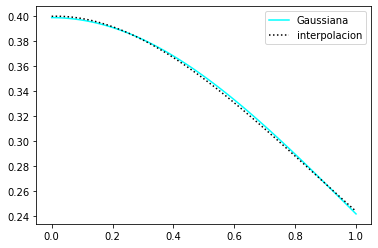

In [12]:
plt.plot(x, gaussiana(x), color = 'cyan', label = 'Gaussiana')
plt.plot(x, [lagrange(xi, puntos1) for xi in x], color = 'black', linestyle=':', label = 'interpolacion')
plt.legend()

In [70]:
type(x)

list

Nuestro polinomio interpolante se acerca a la representación de la función de gauss. Ahora calculamos la integral del polinomio interpolado que encontramos para aproximarnos a la integral de la función Gaussiana.

In [52]:
from scipy import integrate
from scipy import special

Calcular los coeficientes que acompañan al polinomio e integrar el polinomio.

In [13]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [50]:
puntos = np.array([(0, 0.4), (0.5, 0.35), (0.7, 0.31), (0.9, 0.27)]) #tuve que colocarle un [] extra, ya que me generaba un error de tuplas
coef = difer(puntos)

In [51]:
def poly(x, coefs):
        
    return sum(coef[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

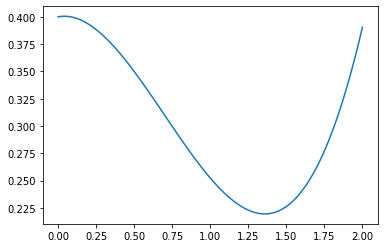

In [52]:
plt.plot(x, [poly(xi, coef) for xi in x])

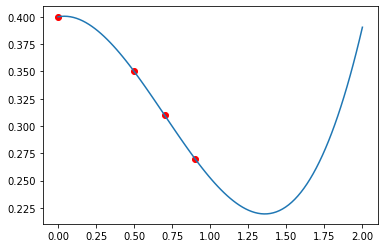

In [49]:
x = np.linspace(0, 2, 100)

plt.plot(x, [poly(xi, coef) for xi in x])
plt.scatter(puntos[:,0], puntos[:,1], color='red')

Lo que necesito es integrar mi funcion poly entre 0 y 1

In [61]:
H = (np.sqrt(np.pi)/2)

In [64]:
H * scipy.special.erf(x)

array([0.        , 0.02019927, 0.04038206, 0.06053194, 0.08063253,
       0.10066761, 0.1206211 , 0.14047711, 0.16021999, 0.17983439,
       0.19930523, 0.2186178 , 0.23775776, 0.25671117, 0.27546454,
       0.29400485, 0.31231955, 0.33039663, 0.34822462, 0.36579261,
       0.38309027, 0.40010785, 0.41683624, 0.43326693, 0.44939206,
       0.46520439, 0.48069735, 0.495865  , 0.51070205, 0.52520387,
       0.53936648, 0.55318651, 0.56666126, 0.57978863, 0.59256715,
       0.60499593, 0.61707469, 0.6288037 , 0.6401838 , 0.65121637,
       0.66190329, 0.67224693, 0.68225017, 0.69191631, 0.70124909,
       0.71025266, 0.71893154, 0.72729061, 0.7353351 , 0.74307052,
       0.75050268, 0.75763764, 0.76448171, 0.77104137, 0.77732333,
       0.78333443, 0.78908166, 0.79457212, 0.79981299, 0.80481155,
       0.8095751 , 0.814111  , 0.8184266 , 0.82252924, 0.82642626,
       0.83012494, 0.83363251, 0.83695614, 0.84010289, 0.84307975,
       0.8458936 , 0.84855119, 0.85105916, 0.85342398, 0.85565

In [63]:
(np.sqrt(np.pi)/2) * scipy.special.erf(1)

0.7468241328124269

$$
\frac{\sqrt{\pi}}{2}
$$

In [29]:
integrate.quad(lambda x: poly(x, coef),0 , 1)

(0.34206349206349207, 3.797667647725734e-15)

In [237]:
integrate.quad(f, 0, 1)

(0.341344746068543, 3.789687964201238e-15)

In [57]:
import scipy
np.sqrt(np.pi)/2 * scipy.special.erf(1)

0.7468241328124269

In [33]:
scipy.special.erf(1)

0.8427007929497148

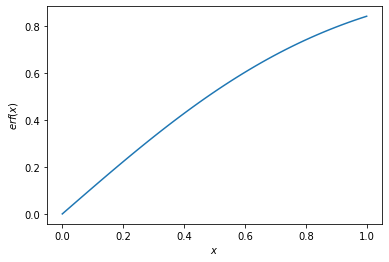

In [35]:
x = np.linspace(0, 1)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()